In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [318]:
df=pd.read_csv("diabetes - diabetes.csv")

In [319]:
df.shape

(768, 9)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [321]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [322]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [323]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [324]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [325]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [326]:
# split the dataset into features and target column
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [327]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [328]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [329]:
x_train.shape,y_train.shape

((576, 8), (576,))

In [330]:
x_test.shape,y_test.shape

((192, 8), (192,))

In [331]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
neighbors = np.arange(1, 11)

train_accuracy = []
test_accuracy = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: [1.0, 0.8385416666666666, 0.8472222222222222, 0.8159722222222222, 0.8072916666666666, 0.7986111111111112, 0.7986111111111112, 0.7864583333333334, 0.796875, 0.7916666666666666]
Testing Accuracy: [0.6666666666666666, 0.7083333333333334, 0.640625, 0.6927083333333334, 0.65625, 0.6927083333333334, 0.6822916666666666, 0.7083333333333334, 0.7135416666666666, 0.71875]


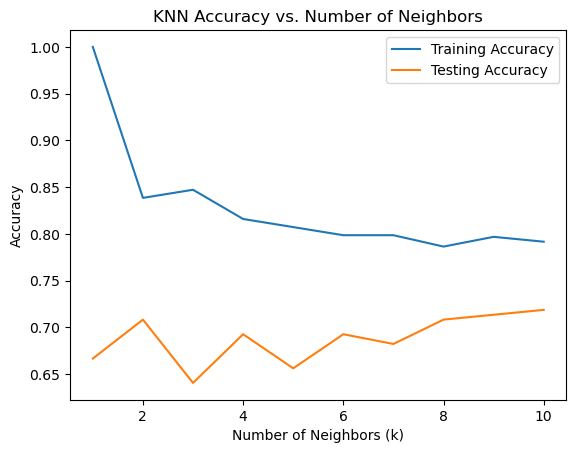

In [332]:
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

In [333]:
# apply ml algorithm into training data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
model = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [334]:
#model prediction
y_pred=model.predict(x_test)

In [335]:
y_pred[:5]

array([1, 0, 0, 0, 0])

In [336]:
y_test[:5]

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [337]:
# Evaluate the model
print("KNN Model Evaluation (Euclidean Distance)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Optional detailed metrics
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


KNN Model Evaluation (Euclidean Distance)
Accuracy: 0.71875
Precision: 0.6363636363636364
Recall: 0.5072463768115942
F1 Score: 0.5645161290322581

Confusion Matrix:
 [[103  20]
 [ 34  35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79       123
           1       0.64      0.51      0.56        69

    accuracy                           0.72       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.71      0.72      0.71       192



#summary::
The project "diabetes.ipynb" presents a complete machine learning workflow for predicting diabetes outcomes using the Pima Indians Diabetes dataset (768 samples, 9 features including Pregnancies, Glucose, BMI, and Outcome as the binary target). It begins with data loading, exploratory analysis (shape, info, descriptive statistics, null/duplicate checks), and visualizations like boxplots for outliers, histograms for feature distributions, and a correlation heatmap. Outliers are handled via IQR method, features are scaled using StandardScaler, and the data is split into 80/20 train-test sets. A K-Nearest Neighbors (KNN) classifier (n_neighbors=10, Euclidean metric) is trained, achieving 72% accuracy, with detailed evaluation metrics including precision (64%), recall (51%), F1-score (~56%), confusion matrix, and classification report, demonstrating a straightforward classification approach to identify diabetes risk factors